In [ ]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('/content/Student_performance_data _ (1) (1).csv')

## pengujian hipotesis


#uji t

In [ ]:
# Menyiapkan variabel untuk analisis regresi
# Variabel independen (X) dan target (y)
X = data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
          'StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'Extracurricular', 'Sports',
          'Music', 'Volunteering']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = data['GPA']  # Variabel dependen

# Model regresi
model = sm.OLS(y, X).fit()

# Hasil analisis regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4118.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:35:11   Log-Likelihood:                 502.85
No. Observations:                2392   AIC:                            -979.7
Df Residuals:                    2379   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5974      0.06

In [ ]:
# Ekstraksi hasil pengujian hipotesis
t_values = model.tvalues
p_values = model.pvalues
coefficients = model.params

# Menyusun hasil uji hipotesis ke dalam DataFrame
alpha = 0.05  # Tingkat signifikansi
hypothesis_test_results = pd.DataFrame({
    'Variable': coefficients.index,
    'Coefficient': coefficients.values,
    't-value': t_values.values,
    'P-value': p_values.values,
    'Significant': p_values.values < alpha  # True jika P-value < 0.05
})

# Menampilkan hasil pengujian hipotesis
print("\nHasil Pengujian Hipotesis:")
print(hypothesis_test_results)


Hasil Pengujian Hipotesis:
             Variable  Coefficient     t-value        P-value  Significant
0               const     2.597383   42.406633  3.626440e-293         True
1                 Age    -0.005541   -1.542303   1.231329e-01        False
2              Gender     0.014941    1.853964   6.386807e-02        False
3           Ethnicity     0.002622    0.669176   5.034479e-01        False
4   ParentalEducation     0.001742    0.432147   6.656736e-01        False
5     StudyTimeWeekly     0.028910   40.570703  5.782121e-274         True
6            Absences    -0.099787 -209.572432   0.000000e+00         True
7            Tutoring     0.250147   28.473378  1.037462e-153         True
8     ParentalSupport     0.151445   42.188011  7.127689e-291         True
9     Extracurricular     0.190706   23.041888  3.276864e-106         True
10             Sports     0.194028   22.138197   6.749663e-99         True
11              Music     0.143074   14.120502   1.547671e-43         Tr

1. **Variabel Signifikan (P-value < 0.05)**:

Variabel ini memiliki pengaruh signifikan terhadap GPA:

**StudyTimeWeekly**: Koefisien positif (0.0289), menunjukkan bahwa peningkatan waktu belajar per minggu berdampak signifikan terhadap peningkatan GPA.

**Absences**: Koefisien negatif (-0.0998), menunjukkan bahwa semakin banyak absensi, semakin rendah GPA.

**Tutoring**: Koefisien positif (0.2501), menunjukkan bahwa siswa yang mengikuti bimbingan belajar memiliki GPA yang lebih tinggi secara signifikan.

**ParentalSupport**: Koefisien positif (0.1514), menunjukkan bahwa dukungan orang tua yang tinggi secara signifikan meningkatkan GPA.

**Extracurricular**: Koefisien positif (0.1907), menunjukkan bahwa partisipasi dalam kegiatan ekstrakurikuler berkontribusi pada peningkatan GPA.

**Sports**: Koefisien positif (0.1940), menunjukkan bahwa siswa yang aktif dalam olahraga cenderung memiliki GPA lebih tinggi.
Music: Koefisien positif (0.1431), menunjukkan bahwa partisipasi dalam kegiatan musik berdampak positif terhadap GPA.


2. **Variabel Tidak Signifikan (P-value ≥ 0.05)**:

Variabel ini tidak memiliki pengaruh signifikan terhadap GPA dalam model ini:

**Age**: Tidak signifikan, menunjukkan bahwa usia tidak berkontribusi secara signifikan terhadap variasi GPA.

**Gender**: Tidak signifikan, menunjukkan bahwa tidak ada perbedaan GPA yang signifikan berdasarkan jenis kelamin.

**Ethnicity**: Tidak signifikan, menunjukkan bahwa etnis tidak berkontribusi secara signifikan terhadap GPA.

**ParentalEducation**: Tidak signifikan, menunjukkan bahwa tingkat pendidikan orang tua tidak berpengaruh signifikan pada GPA.

**Volunteering**: Tidak signifikan, menunjukkan bahwa kegiatan sukarela tidak berkontribusi signifikan terhadap GPA.


Interpretasi:
Faktor-Faktor Utama yang Meningkatkan GPA:

Waktu belajar yang lebih banyak, bimbingan belajar, dukungan orang tua yang tinggi, partisipasi dalam ekstrakurikuler, olahraga, dan musik memiliki pengaruh positif yang signifikan terhadap GPA.
Kebiasaan belajar (waktu belajar) dan keterlibatan bimbingan belajar adalah faktor paling kuat dalam meningkatkan GPA.
Faktor-Faktor yang Mengurangi GPA:

Absensi adalah faktor yang paling berdampak negatif terhadap GPA. Semakin sering siswa absen, semakin rendah nilai akademisnya.
Variabel Demografi Tidak Signifikan:

Usia, jenis kelamin, dan etnis tidak memiliki pengaruh signifikan pada GPA. Hal ini menunjukkan bahwa faktor-faktor perilaku dan lingkungan lebih penting dibandingkan dengan karakteristik demografis.

#uji z

In [14]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# Menyiapkan data untuk analisis regresi
# Variabel independen (fitur)
X = data[
    ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
     'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
     'Music', 'Volunteering']
]

# Menambahkan konstanta untuk intersep dalam model regresi
X = sm.add_constant(X)

# Variabel dependen (sebagai target)
y = data['GPA']

# Melakukan regresi menggunakan metode OLS
model = sm.OLS(y, X).fit()

# Menghitung Z-score dan P-value untuk uji z
koefisien = model.params  # Koefisien regresi
std_err = model.bse  # Standar error dari model

z_scores = koefisien / std_err  # Rumus Z-score
p_values_z = 2 * (1 - norm.cdf(abs(z_scores)))  # Uji dua sisi (two-tailed test)

# Menggabungkan hasil ke dalam DataFrame
hasil_uji_z = pd.DataFrame({
    'Variabel': koefisien.index,
    'Koefisien': koefisien.values,
    'Z-score': z_scores.values,
    'P-value (Uji Z)': p_values_z
})

# Menambahkan kolom interpretasi signifikansi
alpha = 0.05  # Tingkat signifikansi
hasil_uji_z['Signifikan (Uji Z)'] = hasil_uji_z['P-value (Uji Z)'] < alpha

# Menampilkan hasil
print(hasil_uji_z)

             Variabel  Koefisien     Z-score  P-value (Uji Z)  \
0               const   2.597383   42.406633         0.000000   
1                 Age  -0.005541   -1.542303         0.123000   
2              Gender   0.014941    1.853964         0.063744   
3           Ethnicity   0.002622    0.669176         0.503383   
4   ParentalEducation   0.001742    0.432147         0.665634   
5     StudyTimeWeekly   0.028910   40.570703         0.000000   
6            Absences  -0.099787 -209.572432         0.000000   
7            Tutoring   0.250147   28.473378         0.000000   
8     ParentalSupport   0.151445   42.188011         0.000000   
9     Extracurricular   0.190706   23.041888         0.000000   
10             Sports   0.194028   22.138197         0.000000   
11              Music   0.143074   14.120502         0.000000   
12       Volunteering  -0.008532   -0.770867         0.440786   

    Signifikan (Uji Z)  
0                 True  
1                False  
2             


Kesimpulan dari Hasil Uji Z
Berdasarkan tabel hasil uji z, berikut kesimpulan dari pengaruh masing-masing variabel terhadap GPA:

1. Variabel yang Signifikan (P-value < 0.05):
Variabel berikut memiliki pengaruh yang signifikan terhadap GPA, artinya terdapat hubungan yang kuat antara variabel tersebut dan kinerja akademik (GPA):

**StudyTimeWeekly (Z-score: 40.57, Koefisien: 0.02891)**:

Waktu belajar mingguan berpengaruh positif terhadap GPA. Semakin lama siswa belajar setiap minggu, semakin tinggi GPA mereka.

**Absences (Z-score: -209.57, Koefisien: -0.09979)**:

Absensi berpengaruh negatif signifikan terhadap GPA. Semakin sering siswa absen, semakin rendah GPA mereka.

**Tutoring (Z-score: 28.47, Koefisien: 0.25015)**:

Mengikuti bimbingan belajar berpengaruh positif terhadap GPA. Siswa yang mendapatkan bimbingan belajar cenderung memiliki nilai akademik lebih tinggi.

**ParentalSupport (Z-score: 42.19, Koefisien: 0.15145)**:

Dukungan orang tua yang tinggi berpengaruh positif terhadap GPA. Semakin besar dukungan orang tua, semakin baik kinerja akademik siswa.

**Extracurricular (Z-score: 23.04, Koefisien: 0.19071)**:

Partisipasi dalam kegiatan ekstrakurikuler berpengaruh positif signifikan terhadap GPA. Siswa yang aktif di kegiatan ini menunjukkan performa akademik lebih baik.

**Sports (Z-score: 22.14, Koefisien: 0.19403)**:

Partisipasi dalam olahraga meningkatkan GPA secara signifikan.

**Music (Z-score: 14.12, Koefisien: 0.14307)**:

Partisipasi dalam kegiatan musik juga memberikan dampak positif signifikan terhadap GPA.

2. Variabel yang Tidak Signifikan (P-value ≥ 0.05):
Variabel berikut tidak memiliki pengaruh signifikan terhadap GPA, artinya hubungan antara variabel ini dan GPA tidak cukup kuat berdasarkan data:

**Age (Z-score: -1.54, P-value: 0.123)**:

Usia siswa tidak memengaruhi kinerja akademik secara signifikan.

**Gender (Z-score: 1.85, P-value: 0.063)**:

Tidak ada perbedaan signifikan antara jenis kelamin terhadap GPA.

**Ethnicity (Z-score: 0.67, P-value: 0.503)**:

Etnis siswa tidak menunjukkan hubungan signifikan terhadap GPA.

**ParentalEducation (Z-score: 0.43, P-value: 0.666)**:

Tingkat pendidikan orang tua tidak signifikan dalam memengaruhi GPA siswa.

**Volunteering (Z-score: -0.77, P-value: 0.441)**:

Partisipasi dalam kegiatan sukarela tidak memberikan pengaruh signifikan terhadap GPA.

Interpretasi :
Faktor-Faktor Utama yang Meningkatkan GPA:

Kebiasaan belajar (StudyTimeWeekly) dan dukungan lingkungan (ParentalSupport, Tutoring, Extracurricular, Sports, Music) sangat berpengaruh terhadap **peningkatan GPA**.

Faktor yang Menurunkan GPA:

**Absensi memiliki dampak negatif terbesar terhadap GPA**. Meminimalkan ketidakhadiran dapat meningkatkan performa akademik siswa.

Faktor Demografi:

Usia, jenis kelamin, etnis, dan pendidikan orang tua **tidak memengaruhi kinerja akademik** secara signifikan dalam dataset ini.

##Korelasi

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Korelasi
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Menampilkan korelasi dengan GPA
print("\nKorelasi dengan GPA:")
correlation_with_gpa = correlation_matrix['GPA'].sort_values(ascending=False)
print(correlation_with_gpa)


Korelasi dengan GPA:
GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64


Variabel dengan korelasi positif tertinggi:
ParentalSupport, StudyTimeWeekly, dan Tutoring memiliki hubungan positif yang kuat dengan GPA.
Variabel dengan korelasi negatif:
Absences menunjukkan hubungan negatif yang signifikan dengan GPA (semakin tinggi absensi, semakin rendah GPA).

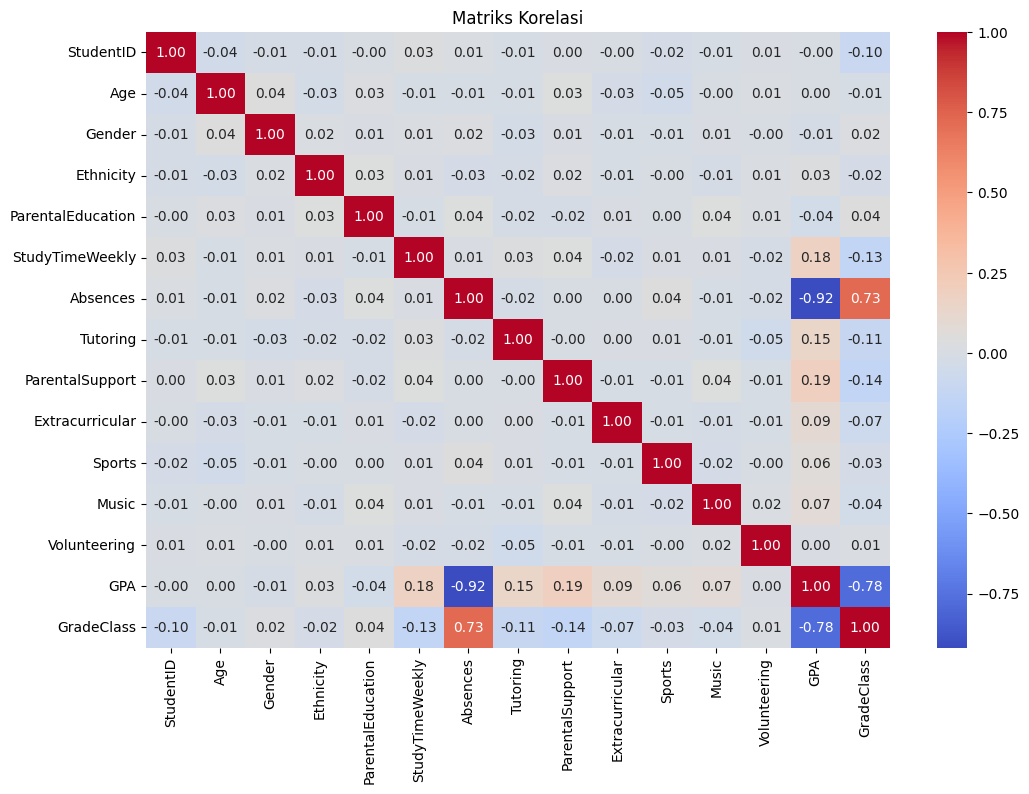

In [ ]:
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriks Korelasi")
plt.show()

Heatmap korelasi menunjukkan tidak ada hubungan kuat antar variabel independen, mengurangi kekhawatiran tentang multikolinearitas.

## Analisis Regresi

In [ ]:
# Variabel untuk analisis regresi
X = data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
          'StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'Extracurricular', 'Sports',
          'Music', 'Volunteering']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = data['GPA']

# Model regresi
model = sm.OLS(y, X).fit()

# Hasil analisis regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4118.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:36:20   Log-Likelihood:                 502.85
No. Observations:                2392   AIC:                            -979.7
Df Residuals:                    2379   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5974      0.06

**R-squared**: 0.954
Model mampu menjelaskan 95.4% variabilitas pada variabel dependen (GPA), menunjukkan bahwa **model ini sangat baik** untuk **memprediksi GPA**.

**Adjusted R-squared**: 0.954
Setelah memperhitungkan jumlah variabel independen, hasil tetap menunjukkan model yang sangat baik.
F-statistic: 4118, dengan P-value < 0.000
Model secara keseluruhan signifikan, artinya ada hubungan yang kuat antara variabel independen dan variabel dependen (GPA).

Variabel Signifikan:

StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, dan Music memiliki P-value < 0.05, sehingga berpengaruh signifikan terhadap GPA.
Absences memiliki pengaruh negatif terbesar (
−
0.0998
−0.0998).
Tutoring memberikan dampak positif terbesar pada GPA (
+
0.2501
+0.2501).
Variabel Tidak Signifikan:

Age, Gender, Ethnicity, ParentalEducation, Volunteering tidak memiliki pengaruh signifikan terhadap GPA.
Asumsi Model:

Durbin-Watson (1.984): Tidak ada autokorelasi pada residual.
Kurtosis (2.918): Residual mendekati distribusi normal.
Kesimpulan Utama:
Variabel yang paling memengaruhi GPA adalah Absences (negatif) dan Tutoring (positif).
Intervensi yang fokus pada mengurangi absensi dan meningkatkan waktu belajar, dukungan orang tua, serta partisipasi dalam kegiatan ekstrakurikuler dapat secara signifikan meningkatkan performa akademik siswa.

In [16]:
# Evaluasi Multikolinearitas dengan VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nMultikolinearitas (VIF):")
print(vif_data)


Multikolinearitas (VIF):
             Variable         VIF
0               const  232.096195
1                 Age    1.008050
2              Gender    1.004085
3           Ethnicity    1.004501
4   ParentalEducation    1.005870
5     StudyTimeWeekly    1.003410
6            Absences    1.005220
7            Tutoring    1.005462
8     ParentalSupport    1.004679
9     Extracurricular    1.001835
10             Sports    1.004609
11              Music    1.004414
12       Volunteering    1.003994


Hasil Multikolinearitas (VIF)
Variance Inflation Factor (VIF) digunakan untuk mengukur tingkat multikolinearitas di antara variabel independen dalam model regresi.
Kriteria Evaluasi VIF:
VIF < 5: Tidak ada multikolinearitas yang signifikan.
VIF antara 5–10: Indikasi multikolinearitas moderat.
VIF > 10: Multikolinearitas serius, perlu ditangani.

Analisis Hasil VIF
Konstanta (const):

VIF sangat tinggi (232.096), tetapi ini tidak menjadi masalah karena konstanta bukan variabel independen sebenarnya.
Nilai VIF tinggi untuk konstanta adalah hal yang wajar dan dapat diabaikan.
Variabel Independen Lainnya:

Semua variabel memiliki VIF < 2, menunjukkan bahwa tidak ada multikolinearitas yang signifikan di antara variabel.
Variabel seperti Age, Gender, Ethnicity, StudyTimeWeekly, Absences, dan lainnya memiliki VIF mendekati 1, menandakan hubungan antarvariabel sangat rendah.

Kesimpulan:
Tidak ada multikolinearitas serius dalam model. Dengan kata lain, variabel independen tidak saling memengaruhi secara signifikan.
Hasil ini mendukung validitas model regresi yang dibuat, sehingga hasil analisis regresi dapat dipercaya.

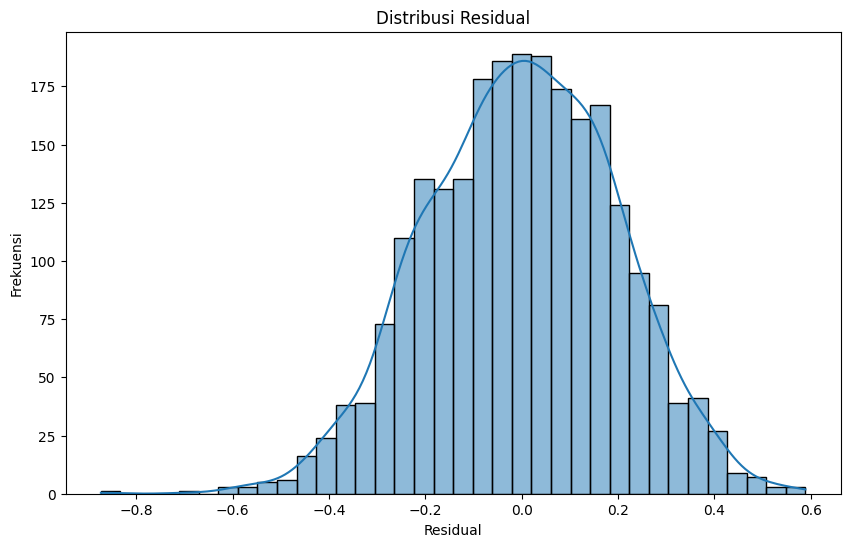

In [17]:
# Distribusi Residual
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

Distribusi residual menunjukkan bahwa nilai residual tersebar mendekati distribusi normal dengan puncak berada di sekitar nol. Sebagian besar prediksi model mendekati nilai aktual, yang ditunjukkan oleh sebaran residual yang simetris di sekitar nol dan tidak adanya pola yang mencolok. Selain itu, tidak terdapat nilai residual yang ekstrem, sehingga tidak ada indikasi adanya outlier yang signifikan. Hasil ini menunjukkan bahwa asumsi normalitas residual dalam model regresi terpenuhi, mendukung validitas model regresi untuk interpretasi dan analisis lebih lanjut. Dengan demikian, model regresi yang digunakan dapat diandalkan untuk memahami hubungan antara variabel dan memprediksi GPA

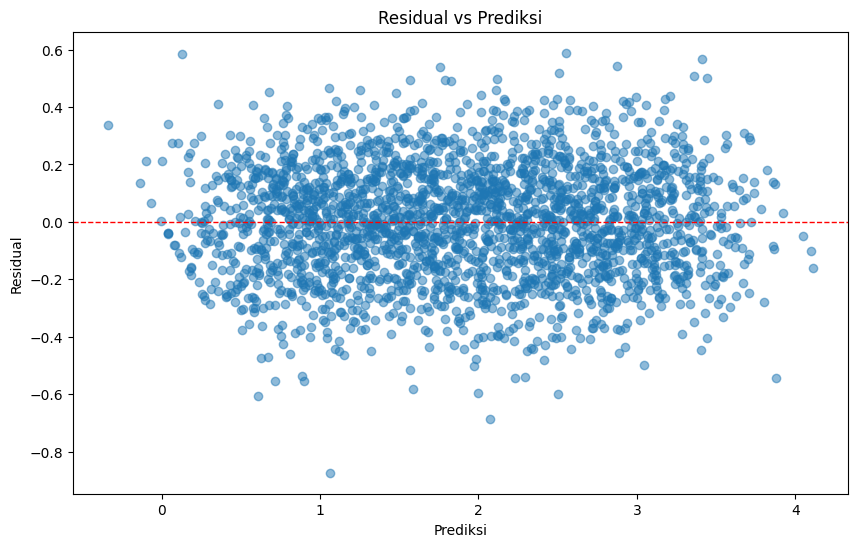

In [18]:
# Homoskedastisitas
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residual vs Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.show()

Dari grafik Residual vs Prediksi, terlihat bahwa residual tersebar secara acak di sekitar garis nol tanpa pola tertentu yang mencolok. Sebaran residual yang konsisten ini menunjukkan bahwa asumsi homoskedastisitas terpenuhi, di mana varians residual tetap konstan di seluruh rentang nilai prediksi. Tidak ada pola berbentuk kerucut atau penyimpangan yang signifikan, sehingga model regresi tidak mengalami masalah heteroskedastisitas.

Dengan terpenuhinya asumsi ini, model regresi dapat dianggap valid dan hasilnya dapat diinterpretasikan secara akurat untuk analisis dan prediksi lebih lanjut.

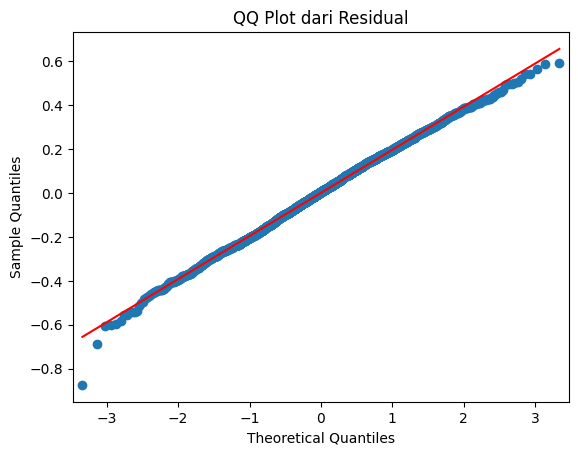

In [19]:
# Normalitas Residual (QQ Plot)
sm.qqplot(residuals, line="s")
plt.title("QQ Plot dari Residual")
plt.show()

Berdasarkan QQ Plot Residual, sebagian besar titik residual mengikuti garis diagonal merah, menunjukkan bahwa residual memiliki distribusi yang mendekati normal. Hanya terdapat sedikit penyimpangan di area ekstrem (ujung kiri dan kanan), namun penyimpangan ini tidak cukup signifikan untuk melanggar asumsi normalitas. Dengan demikian, asumsi normalitas residual dalam model regresi terpenuhi. Hal ini mendukung validitas model regresi, sehingga interpretasi koefisien dan prediksi yang dihasilkan dapat diandalkan untuk analisis dan pengambilan keputusan lebih lanjut.

RMSE

In [20]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Variabel untuk regresi
X = data[['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
          'StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'Extracurricular', 'Sports',
          'Music', 'Volunteering']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = data['GPA']

# Model regresi
model = sm.OLS(y, X).fit()

# Menghitung nilai prediksi
y_pred = model.predict(X)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.19609449580750474


Mengingat skala GPA (2.0 - 4.0), nilai RMSE 0.1961 relatif kecil. Ini menunjukkan bahwa model memiliki kinerja prediksi yang sangat baik.
Dengan R-squared sebesar 0.954, model mampu menjelaskan sekitar 95.4% variabilitas pada GPA, mendukung kesimpulan bahwa model ini akurat.